In [52]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits

In [62]:
hdul= fits.open('/Users/ganga/gll_iem_v02_P2_V11_DIFFUSE.fit')
#hdul.info()
#No: of HDU's is 2

In [63]:
hdr = hdul[0].header
print("Length of axis 3:",hdr['NAXIS3'])
print("Axis 3 represents:",hdr['CTYPE3'])
print("Units of axis 3:",hdr['CUNIT3'])
print("Name of Telescope:",hdr['TELESCOP'])
print("Name of observer:",hdr['OBSERVER'])

Length of axis 3: 30
Axis 3 represents: photon energy
Units of axis 3: MeV
Name of Telescope: GLAST
Name of observer: MICHELSON


In [64]:
data = hdul[0].data
img = data[0]

print('Minimum pixel value:', np.min(img))
print('Maximum pixel value:', np.max(img))
print('Standard Deviation:', np.std(img))

Minimum pixel value: 7.027717e-08
Maximum pixel value: 4.5921523e-05
Standard Deviation: 1.3843595e-06


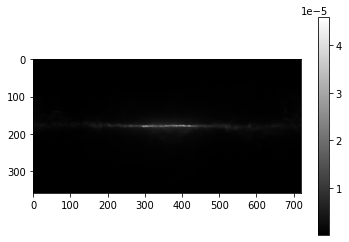

In [65]:
plt.imshow(img, cmap='gray',vmin=np.min(img), vmax=np.max(img));
plt.colorbar()

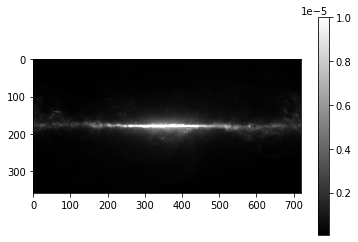

In [66]:
#Drawing a plot with lower vmax value for a clearer plot
plt.imshow(img, cmap='gray',vmin=np.min(img), vmax=1.e-5);
plt.colorbar()

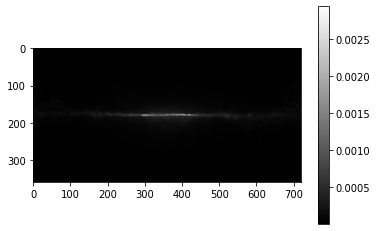

In [67]:
for i in range(4,30,5):
    img+=data[0]
plt.imshow(img, cmap='gray',vmin=np.min(img), vmax=np.max(img))
plt.colorbar()

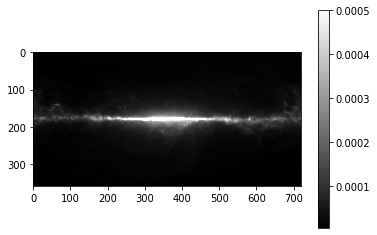

In [74]:
plt.imshow(img, cmap='gray',vmin=np.min(img), vmax=5.e-4)
plt.colorbar()

In [75]:
hdul.close()

In [78]:
from astropy import units as u
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from astropy.time import Time

def Alt(coord,time_input):
   iitm = EarthLocation(lat=12.992*u.deg, lon=80.234*u.deg, height=50*u.m)
   time_obv=Time(time_input)+ 12*u.hour
   coord_h = coord.transform_to(AltAz(obstime=time_obv, location=iitm))
   return coord_h

#final_coord=Alt(SkyCoord(12.11*u.deg, 85.26*u.deg),'2021-7-11 22:00:00')
#final_coord.alt
#This give output 9deg03'07.682"